<a href="https://colab.research.google.com/github/MadsNL/AMLMain/blob/main/AML_IceCores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! gdown --id 1paSsYReykEVDPX8pA2SUf7Gr7Lptq-PX
! unzip Insoluables_TrainingData26May2022.zip
!git clone https://github.com/MadsNL/AMLpackages.git
import sys
sys.path.append('/content/AMLpackages/')
from load_data import training_set, not_training_set

Streaming output truncated to the last 5000 lines.
  inflating: Insoluables_TrainingData/train/qsuber/qsub_17nov_1_fc80_20x_5504.png  
  inflating: Insoluables_TrainingData/train/qsuber/qsub_17nov_1_fc80_20x_5505.png  
  inflating: Insoluables_TrainingData/train/qsuber/qsub_17nov_1_fc80_20x_5506.png  
 extracting: Insoluables_TrainingData/train/qsuber/qsub_17nov_1_fc80_20x_5507.png  
  inflating: Insoluables_TrainingData/train/qsuber/qsub_17nov_1_fc80_20x_5508.png  
  inflating: Insoluables_TrainingData/train/qsuber/qsub_17nov_1_fc80_20x_5509.png  
 extracting: Insoluables_TrainingData/train/qsuber/qsub_17nov_1_fc80_20x_551.png  
  inflating: Insoluables_TrainingData/train/qsuber/qsub_17nov_1_fc80_20x_5510.png  
  inflating: Insoluables_TrainingData/train/qsuber/qsub_17nov_1_fc80_20x_5511.png  
  inflating: Insoluables_TrainingData/train/qsuber/qsub_17nov_1_fc80_20x_5512.png  
  inflating: Insoluables_TrainingData/train/qsuber/qsub_17nov_1_fc80_20x_5513.png  
  inflating: Insoluables_T

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [3]:
sup_path = '/content/Insoluables_TrainingData/train/'
sup_im_path = '/content/Insoluables_TrainingData/train/'
sup_df = pd.read_csv(sup_path+'train.csv')
sup = training_set(sup_df, sup_im_path)

In [4]:
# save image_size
im_e, _, _ = sup.__getitem__(0)
image_size = im_e.shape[0]
image_size

128

In [5]:
# create encoder training
nr_tot_images = len(sup.labels)
x_train = []
nr_ims = 1000
for i in range(nr_ims):
    rand_idx = np.random.randint(0,nr_tot_images)
    x_train.append(sup.__getitem__(rand_idx)[0])
x_train = np.array(x_train)

In [6]:
x_train.shape

(1000, 128, 128)

In [7]:
latent_dim = 128
image_size= 128
unit_n = 32

encoder_input = keras.Input(shape=(image_size,image_size,1))
x = keras.layers.Conv2D(filters=32, kernel_size=3, strides=(2,2), activation='relu')(encoder_input)
x = keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2,2), activation='relu')(x)
x = keras.layers.Flatten()(x)
encoder_output = keras.layers.Dense(latent_dim)(x)

encoder = keras.Model(encoder_input, encoder_output, name='encoder')

decoder_input = keras.layers.InputLayer(input_shape=latent_dim)(encoder_output)
x = keras.layers.Dense(units=unit_n*unit_n*32, activation=tf.nn.relu)(decoder_input)
x = keras.layers.Reshape(target_shape=(unit_n, unit_n, 32))(x)
x = keras.layers.Conv2DTranspose(
    filters=64, kernel_size=3, strides=2, padding='same',
    activation='relu')(x)
x = keras.layers.Conv2DTranspose(
    filters=32, kernel_size=3, strides=2, padding='same',
    activation='relu')(x)
# No activation
decoder_output = keras.layers.Conv2DTranspose(
    filters=1, kernel_size=3, strides=1, padding='same')(x)

autoencoder = keras.Model(encoder_input, decoder_output, name='autoencoder')
autoencoder.summary()

opt = keras.optimizers.Adam(lr=0.001, decay=1e-6)

autoencoder.compile(opt, loss='mse')

Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 63, 63, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 31, 31, 64)        18496     
                                                                 
 flatten (Flatten)           (None, 61504)             0         
                                                                 
 dense (Dense)               (None, 128)               7872640   
                                                                 
 input_2 (InputLayer)        multiple                  0         
                                                                 
 dense_1 (Dense)             (None, 32768)             

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1
29/29 [==============================] - 13s 44ms/step - loss: 0.1043 - val_loss: 0.0385


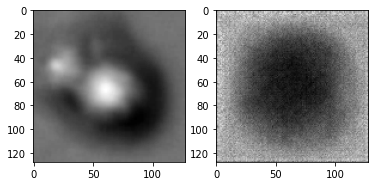

2
29/29 [==============================] - 1s 35ms/step - loss: 0.0364 - val_loss: 0.0286


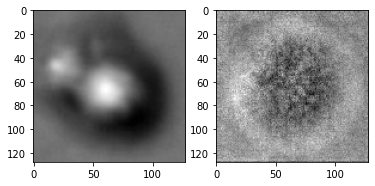

3
29/29 [==============================] - 1s 32ms/step - loss: 0.0287 - val_loss: 0.0257


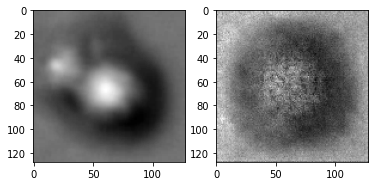

4
29/29 [==============================] - 1s 33ms/step - loss: 0.0254 - val_loss: 0.0221


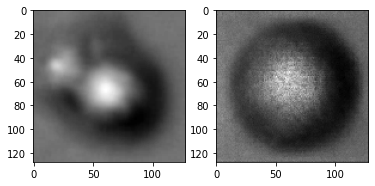

5
29/29 [==============================] - 1s 33ms/step - loss: 0.0200 - val_loss: 0.0170


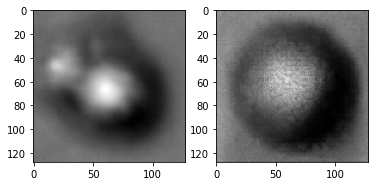

6
29/29 [==============================] - 1s 33ms/step - loss: 0.0160 - val_loss: 0.0143


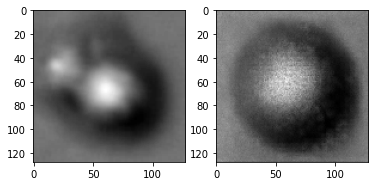

7
29/29 [==============================] - 1s 38ms/step - loss: 0.0136 - val_loss: 0.0125


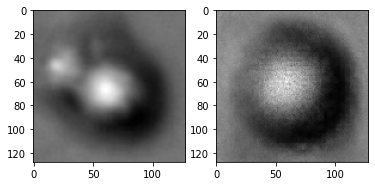

8
29/29 [==============================] - 1s 33ms/step - loss: 0.0121 - val_loss: 0.0120


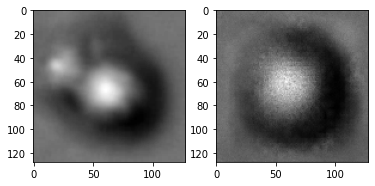

9
29/29 [==============================] - 1s 33ms/step - loss: 0.0110 - val_loss: 0.0108


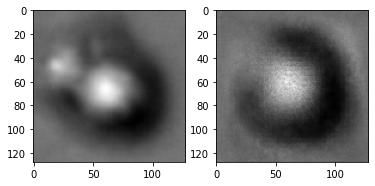

10
29/29 [==============================] - 1s 32ms/step - loss: 0.0100 - val_loss: 0.0100


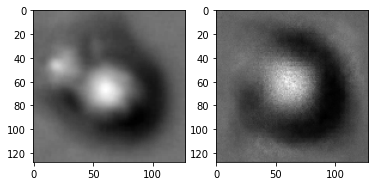

11
29/29 [==============================] - 1s 34ms/step - loss: 0.0094 - val_loss: 0.0097


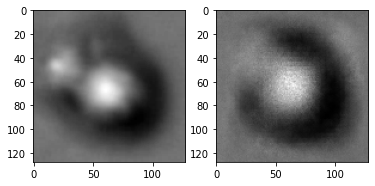

12
29/29 [==============================] - 1s 34ms/step - loss: 0.0092 - val_loss: 0.0095


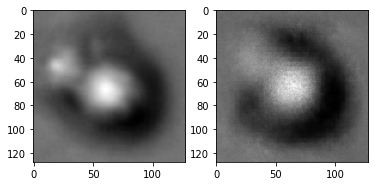

13
29/29 [==============================] - 1s 34ms/step - loss: 0.0080 - val_loss: 0.0085


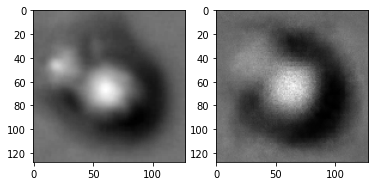

14
29/29 [==============================] - 1s 34ms/step - loss: 0.0074 - val_loss: 0.0082


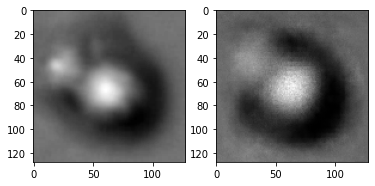

15
29/29 [==============================] - 1s 34ms/step - loss: 0.0078 - val_loss: 0.0078


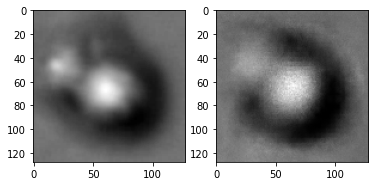

16
29/29 [==============================] - 1s 33ms/step - loss: 0.0068 - val_loss: 0.0076


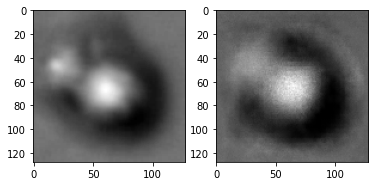

17
29/29 [==============================] - 1s 33ms/step - loss: 0.0063 - val_loss: 0.0079


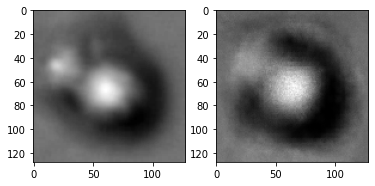

18
29/29 [==============================] - 1s 33ms/step - loss: 0.0068 - val_loss: 0.0070


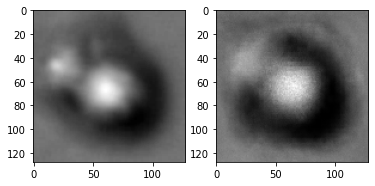

19
29/29 [==============================] - 1s 32ms/step - loss: 0.0059 - val_loss: 0.0071


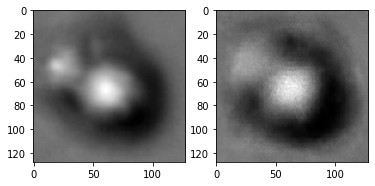

20
29/29 [==============================] - 1s 32ms/step - loss: 0.0056 - val_loss: 0.0066


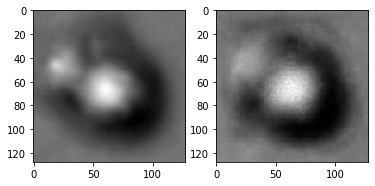

21
29/29 [==============================] - 1s 33ms/step - loss: 0.0051 - val_loss: 0.0062


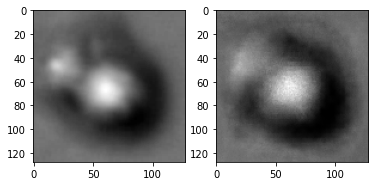

22
29/29 [==============================] - 1s 33ms/step - loss: 0.0047 - val_loss: 0.0058


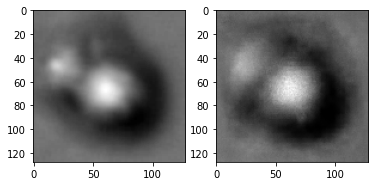

23
29/29 [==============================] - 1s 33ms/step - loss: 0.0045 - val_loss: 0.0055


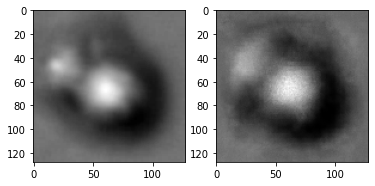

24
29/29 [==============================] - 1s 32ms/step - loss: 0.0043 - val_loss: 0.0058


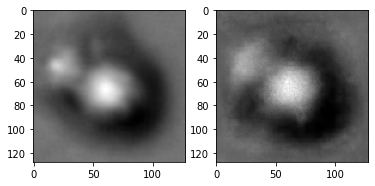

25
29/29 [==============================] - 1s 34ms/step - loss: 0.0044 - val_loss: 0.0054


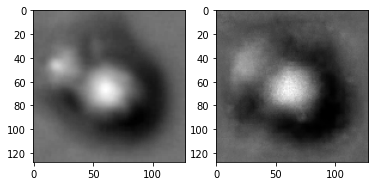

26
29/29 [==============================] - 1s 33ms/step - loss: 0.0047 - val_loss: 0.0054


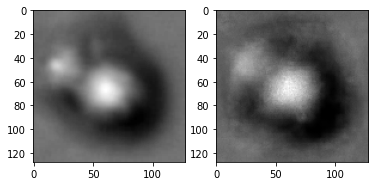

27
29/29 [==============================] - 1s 34ms/step - loss: 0.0038 - val_loss: 0.0055


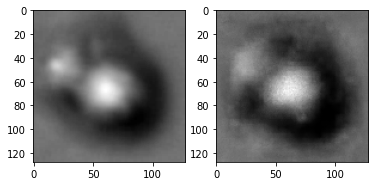

28
29/29 [==============================] - 1s 32ms/step - loss: 0.0040 - val_loss: 0.0053


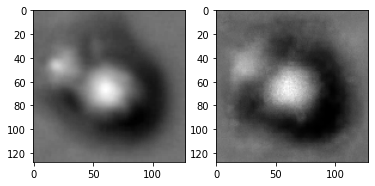

29
29/29 [==============================] - 1s 33ms/step - loss: 0.0036 - val_loss: 0.0051


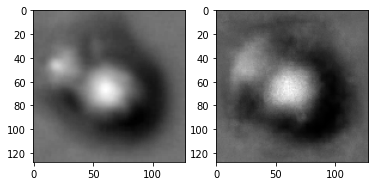

30
29/29 [==============================] - 1s 34ms/step - loss: 0.0032 - val_loss: 0.0049


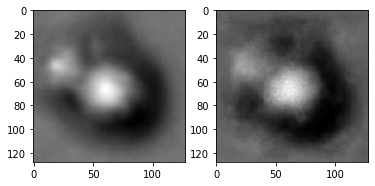

In [8]:
for i in range(30):
  print(i+1)
  autoencoder.fit(x_train, x_train, epochs=1, batch_size=32, validation_split=0.1)
  test_im = sup.__getitem__(3000)[0]
  plt.figure()
  plt.subplot(1,2,1)
  plt.imshow(test_im,cmap='gray')
  plt.subplot(1,2,2)
  im_pred = autoencoder.predict(test_im.reshape(-1,image_size,image_size,1)).reshape(128,128)
  plt.imshow(im_pred,cmap='gray')
  plt.show()